In [4]:
import numpy as np
import pandas as pd
import cPickle as pkl
from matplotlib import pyplot as plt
import time

from sklearn.datasets import make_spd_matrix
import sklearn.covariance as skcov

import random
from scipy.stats import multivariate_normal

In [5]:
""" Generates random covariance matrix with `nb` independent blocks
"""
def generate_covariance(n, nb=2):
    sizes=[]
    for i in range(n%nb):
        sizes.append(n//nb+1)
    for i in range(nb-n%nb):
        sizes.append(n//nb)
    assert sum(sizes) == n
    pref = 0
    ret = np.zeros((n, n))
    for s in sizes:
        ret[pref:pref+s, pref:pref+s] = make_spd_matrix(s)
        pref += s
    return ret

In [62]:
nv = 3
myu = np.zeros((nv,))
sigma1 = np.array([
    [1.0, 0.95, 0.0],
    [0.95, 1.0, 0.0],
    [0.0, 0.0, 1.0]
])
diag = np.eye(nv)

In [63]:
X = []
for i in range(8):
    X += [np.random.multivariate_normal(myu, sigma1)]
for i in range(10):
    cov = np.array(sigma1)
    cov[0][1] /= (2**i)
    cov[1][0] /= (2**i)
    cov[1][2] = cov[2][1] = 1.0 - 1.0 / (2**i)
    X += [np.random.multivariate_normal(myu, cov)]
for i in range(8):
    X += [np.random.multivariate_normal(myu, diag)]

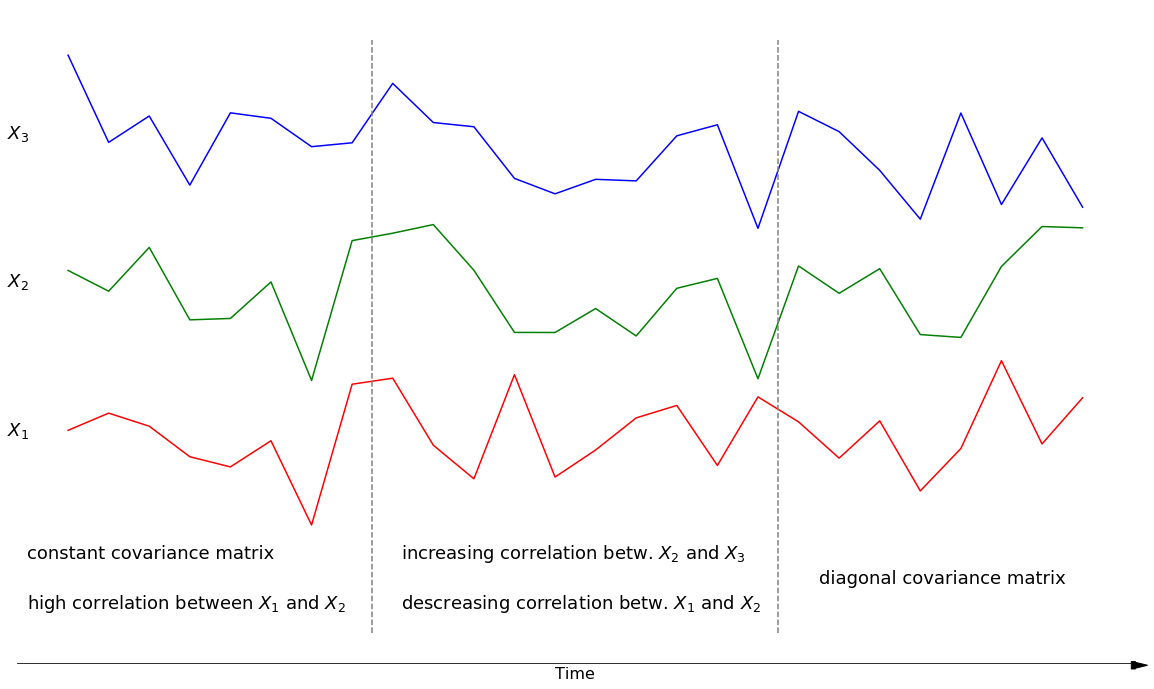

In [187]:
X = np.array(X)
colors = ['red', 'green', 'blue', 'magenta']
plt.figure(figsize=(20, 12))
for i in range(nv):
    plt.plot(3*i + X[:, i], c=colors[i])

plt.xticks([])
plt.yticks([])
plt.text(-1.5,0,"$X_1$",fontsize=18)
plt.text(-1.5,3,"$X_2$",fontsize=18)
plt.text(-1.5,6,"$X_3$",fontsize=18)
plt.xlabel("Time", fontsize=16)
for i, spine in enumerate(plt.gca().spines.values()):
    if i == 0:
        spine.set_visible(False)
    if i == 1:
        spine.set_visible(False)
    if i == 3:
        spine.set_visible(False)
plt.arrow(26.2, -4.65, 0.1, 0, width=0.15, color="k", clip_on=False, head_width=0.12, head_length=0.3)
#plt.plot([],[])
#plt.xticks(range(len(X)))

plt.plot([7.5, 7.5], [-4, 8], '--', c='gray')
plt.plot([17.5, 17.5], [-4, 8], '--', c='gray')

plt.text(-1, -2.5, "constant covariance matrix", fontsize=18)
plt.text(-1, -3.5, "high correlation between $X_1$ and $X_2$", fontsize=18)


plt.text(8.2, -2.5, "increasing correlation betw. $X_2$ and $X_3$", fontsize=18)
plt.text(8.2, -3.5, "descreasing correlation betw. $X_1$ and $X_2$", fontsize=18)

plt.text(18.5, -3.0, "diagonal covariance matrix", fontsize=18)


plt.show()